In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [159]:
df = pd.read_csv('../data/market_integrates_6.csv')
print(df)



     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1         5.232411        20.160955  2.543331   
1             1         2         5.569271        20.364170  2.571422   
2             1         3         5.116280        20.742656  2.610514   
3             1         4         5.837113        20.783531  2.483436   
4             1         5         5.521062        20.092148  2.527930   
..          ...       ...              ...              ...       ...   
995         100         6         5.134749        20.327134  2.862196   
996         100         7         5.427120        20.244385  2.560330   
997         100         8         5.707589        20.782557  2.313871   
998         100         9         5.585675        20.193838  2.602222   
999         100        10         5.605105        20.321631  2.624007   

     marginal_cost    shares   profits   markups  e_quantity    capital  \
0         1.910574  0.018034  0.011411  1.331187

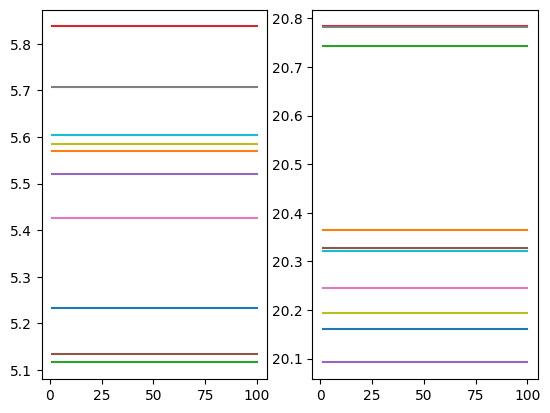

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.characteristic1)
    ax2.plot(df_firm.market_ids, df_firm.characteristic2)



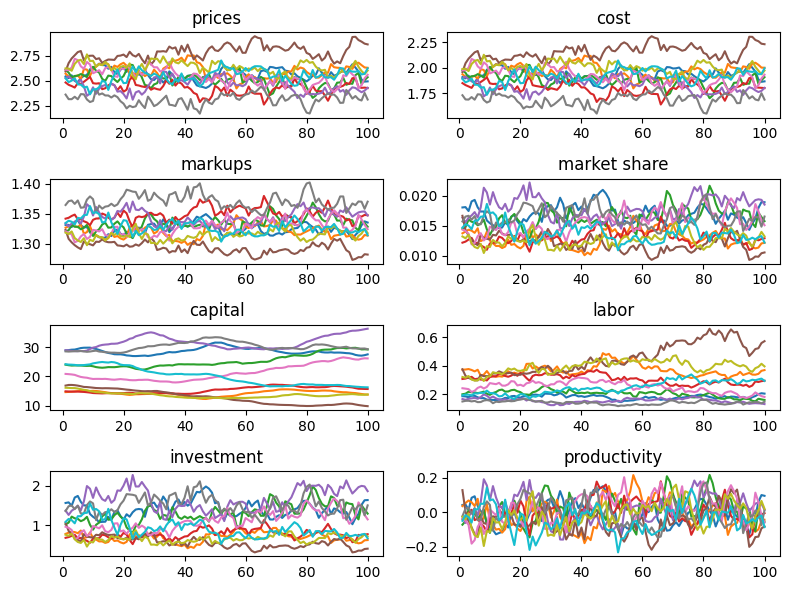

In [161]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(8,6))

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.prices)
    ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    ax3.plot(df_firm.market_ids, df_firm.markups)
    ax4.plot(df_firm.market_ids, df_firm.shares)
    ax5.plot(df_firm.market_ids, df_firm.capital)
    ax6.plot(df_firm.market_ids, df_firm.labor)
    ax7.plot(df_firm.market_ids, df_firm.investment)
    ax8.plot(df_firm.market_ids, df_firm.productivity)


ax1.set_title('prices')
ax2.set_title('cost')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax8.set_title('productivity')


plt.tight_layout()
plt.show()

In [162]:
# df_cc = pd.read_csv('../data/market_constant_cost100.csv')
df_grouped_cc = df.groupby('firm_ids')
# Look at the firm with bad product charactristics
group1_cc = df_grouped_cc.get_group(2)
# Look at a firm with good product characteristics
group4_cc = df_grouped_cc.get_group(4)




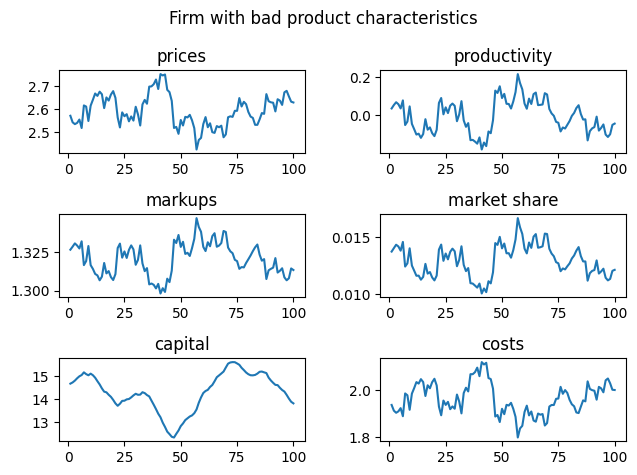

In [163]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with bad product characteristics')

ax1.plot(group1_cc.market_ids, group1_cc.prices)
ax2.plot(group1_cc.market_ids, group1_cc.productivity)
ax3.plot(group1_cc.market_ids, group1_cc.markups)
ax4.plot(group1_cc.market_ids, group1_cc.shares)
ax5.plot(group1_cc.market_ids, group1_cc.capital)
ax6.plot(group1_cc.market_ids, group1_cc.marginal_cost)

ax1.set_title('prices')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()


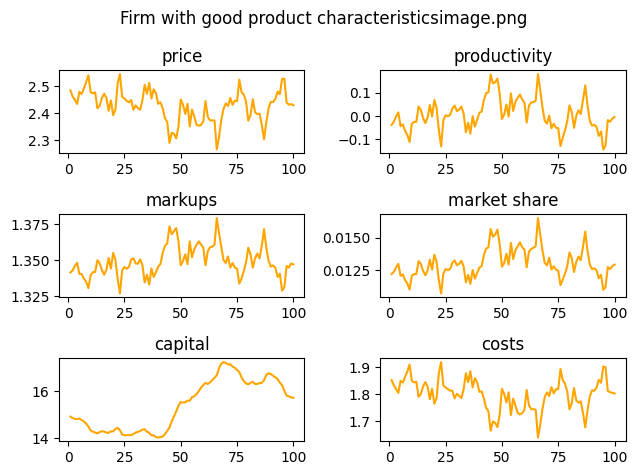

In [164]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with good product characteristicsimage.png')

ax1.plot(group4_cc.market_ids, group4_cc.prices, color='orange')
ax2.plot(group4_cc.market_ids, group4_cc.productivity, color='orange')
ax3.plot(group4_cc.market_ids, group4_cc.markups, color='orange')
ax4.plot(group4_cc.market_ids, group4_cc.shares, color='orange')
ax5.plot(group4_cc.market_ids, group4_cc.capital, color='orange')
ax6.plot(group4_cc.market_ids, group4_cc.marginal_cost, color='orange')

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()

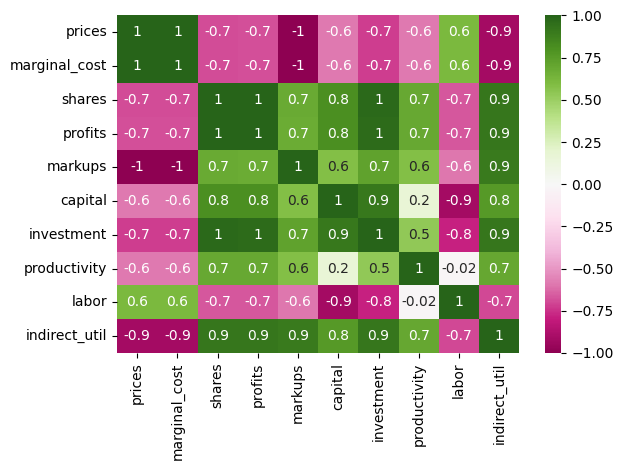

In [165]:
heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
# heatmap_df = df.drop(['market_ids','firm_ids', 'e_quantity'], axis=1)

fig = sns.heatmap(heatmap_df.corr(), vmin = -1., vmax=1., cmap="PiYG", annot=True, fmt='.1g')
plt.tight_layout() 
plt.savefig('correlation_map_model.pdf')